# Mini projects

## Level 1

### Photo art app

1. Create a function that receives an image and converts it to a sketch so it looks similar to this:
![Example 1](img/sketch.png)

In [50]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['image.cmap'] = 'gray'
%matplotlib inline

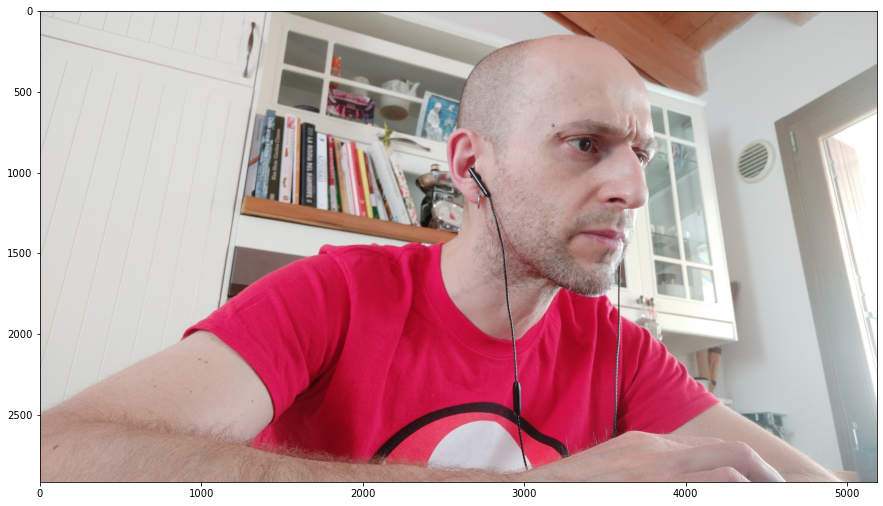

In [53]:
orig = cv2.imread('./img/me.jpg')

plt.figure(figsize = (15, 10))
plt.imshow(cv2.cvtColor(orig, cv2.COLOR_BGR2RGB));

In [71]:
me = orig.copy()

me = cv2.cvtColor(me, cv2.COLOR_BGR2GRAY)
_, me = cv2.threshold(me, 128, 255, cv2.THRESH_BINARY)
me = cv2.bitwise_not(cv2.Canny(me, 0.1, 0.1))


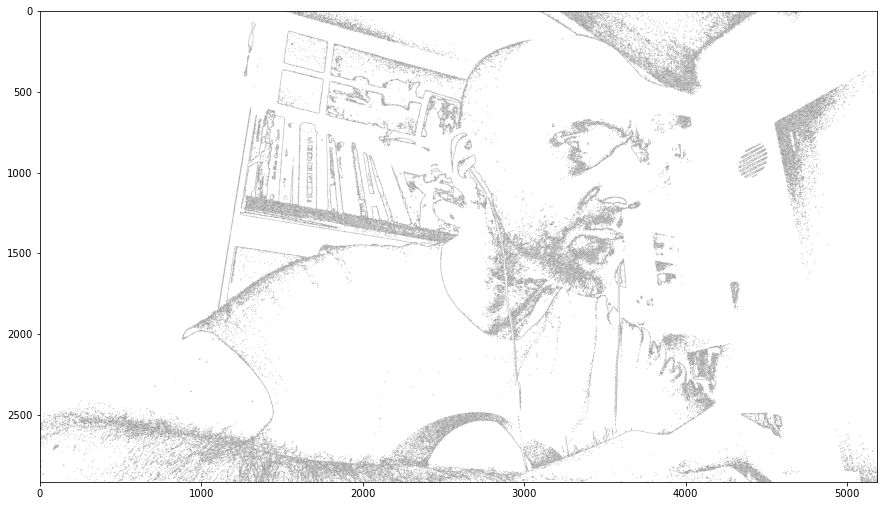

In [72]:
plt.figure(figsize = (15, 10))
plt.imshow(me, cmap='gray');

### Instagram filters app

1. Create a function that given a photo it applies a black and white filter
1. Create a filter that will change color of the image 

## Level 2

### Photo art app

1. Change the app so it can now do the same but using your webcam to make it in real time  
**Hint:** you can use ```cv2.VideoCapture(0)```

### Photo correction app

1. Create a funtion to clean *noise* from images
![Noisy image](img/n.png)

### Instagram filters app

1. Create a function that applies a sepia filter to the image, for a BGR image apply this kernel:
        [0.272, 0.534, 0.131],
        [0.349, 0.686, 0.168],
        [0.393, 0.769, 0.189]
        
Get the BGR value of the pixel.
Calculate tr, tg and tb using the formula

tb = 0.272R + 0.534G + 0.131B
tg = 0.349R + 0.686G + 0.168B
tr = 0.393R + 0.769G + 0.189B

Take the integer value.

Set the new RGB value of the pixel as per the following condition:

If tb > 255 then b = 255 else b = tb
If tg > 255 then g = 255 else g = tg
If tr > 255 then r = 255 else r = tr


Example:

Consider a color pixel with the following values

A = 255

R = 100

G = 150

B = 200

Where A, R, G and B represents the Alpha, Red, Green and Blue value of the pixel.

Remember! ARGB will have an integer value in the range 0 to 255.

So, to convert the color pixel into sepia pixel we have to first calculate tr, tg and tb.

tr = 0.393(100) + 0.769(150) + 0.189(200)

tr = 192.45

tr = 192 (taking integer value)

Similarly,

tg = 0.349(100) + 0.686(150) + 0.168(200) = 171 (taking integer value)

and tb = 0.272(100) + 0.534(150) + 0.131(200) = 133 (taking integer value)

## Level 3

### Instagram filters app

1. Apply the sepia filter by using the cv2.transfor function
1. Create different filters from the sepia filter so it renders different images

# More projects

## Handwriting recognition

1. Write a one digit number (from 0 to 9) on a paper and using your mobile phone take a picture of it
1. Crop the image manually and pass it to a a function that will process it so it looks like a char in the MNIST dataset, make sure it is the correct size as well
![4](img/4.png)

In [1]:
!ls img

4.png		coral.jpg   notes.png	reef_diver.jpg	text.png
city.jpg	DIGITS.jpg  n.png	reef.jpg
clean-text.jpg	noisy.png   otters.png	sketch.png


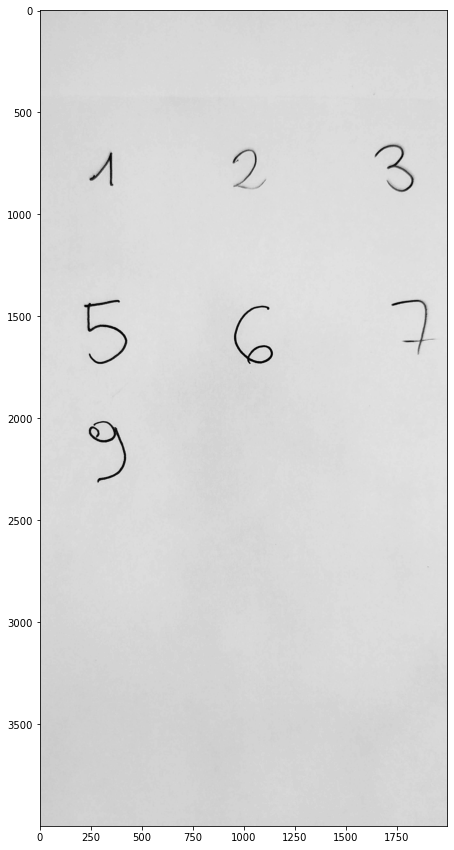

In [4]:
digits = cv2.imread('./img/DIGITS.jpg', cv2.IMREAD_GRAYSCALE)
plt.figure(figsize = (20,15))
plt.imshow(digits);

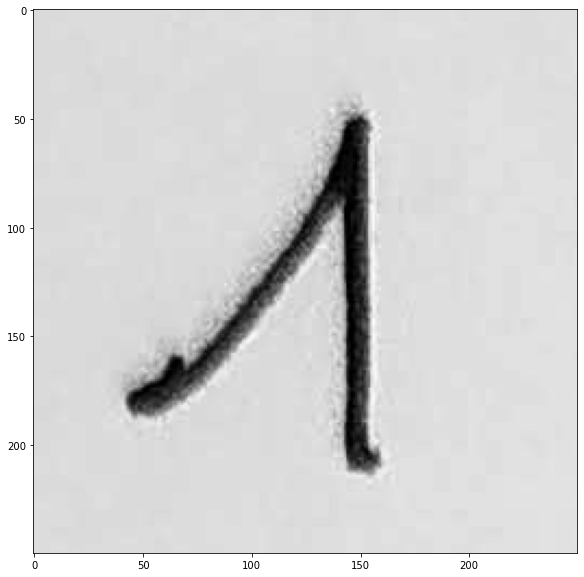

In [6]:
one = digits[650:900,200:450]
plt.figure(figsize = (10,10))
plt.imshow(one);

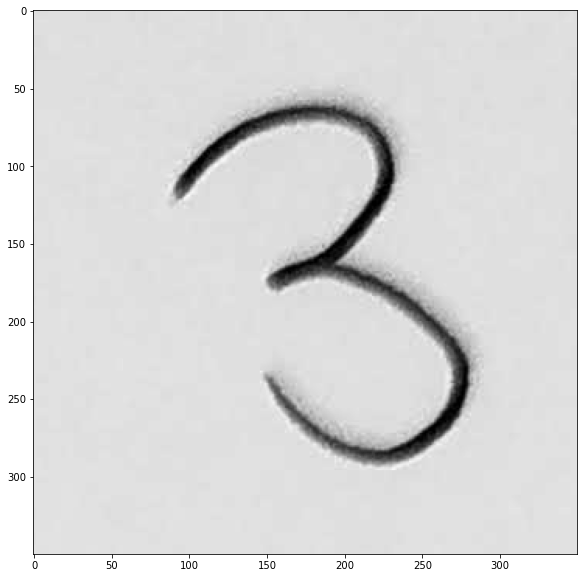

In [16]:
three = digits[600:950,1550:1900]
plt.figure(figsize = (10,10))
plt.imshow(three);

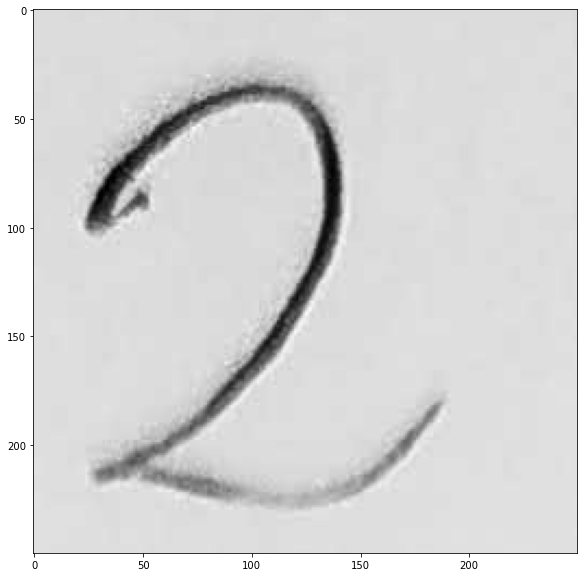

In [25]:
two = digits[650:900,920:1170]
plt.figure(figsize = (10,10))
plt.imshow(two);

In [46]:
def to_mnist(img):
    img = cv2.blur(img, (9, 9))
    _, img = cv2.threshold(img, 175, 255, cv2.THRESH_TRUNC)
    img = cv2.resize(img, (28, 28), interpolation=cv2.INTER_LANCZOS4)
    
    img = cv2.bitwise_not(img)

    return img


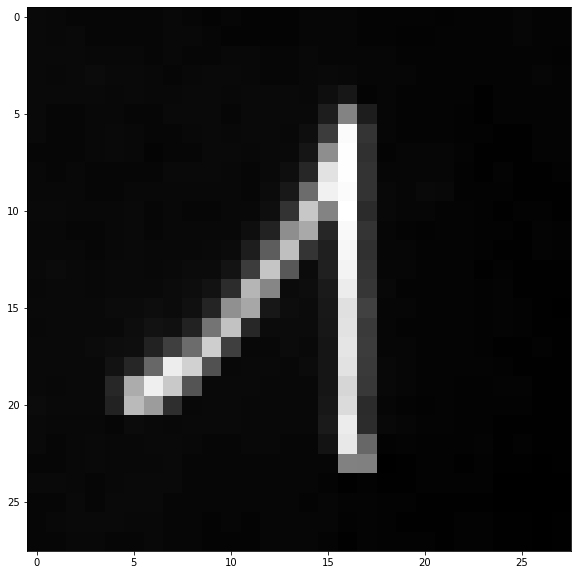

In [47]:
one_mnist = to_mnist(one)

plt.figure(figsize = (10, 10))
plt.imshow(one_mnist);

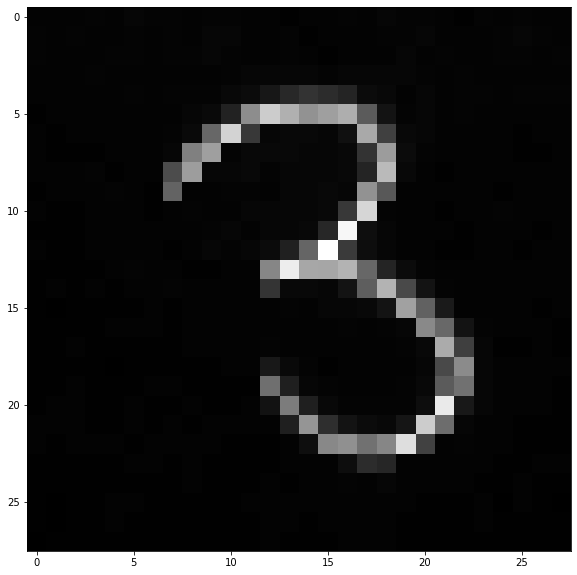

In [48]:
three_mnist = to_mnist(three)

plt.figure(figsize = (10,10))
plt.imshow(three_mnist);

1. Pass it through a MNIST classifier and print the prediction on screen

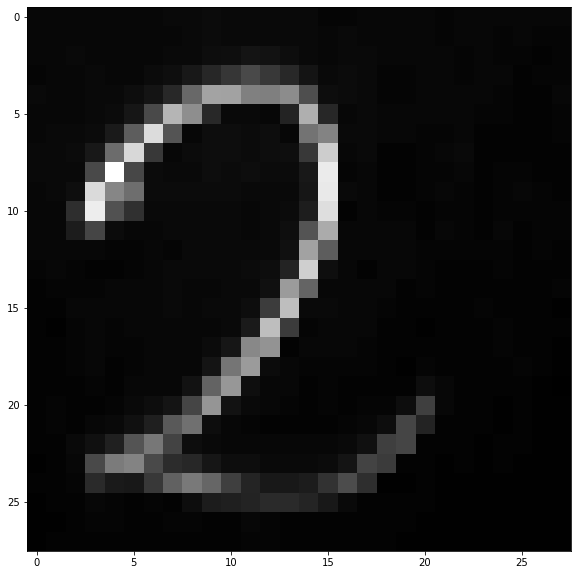

In [49]:
two_mnist = to_mnist(two)

plt.figure(figsize = (10,10))
plt.imshow(two_mnist);

In [168]:
import torch
from torch import nn
from torch import optim
import torch.nn.functional as F

from torchvision import datasets, transforms

In [169]:
class Exercise_net(nn.Module):
    
    # Defining the layers, 128, 64, 10 units each
    def __init__(self):
        super().__init__()
        # input layer
        self.fc1 = nn.Linear(784, 16)
        # first hidden layer, size = 16
        self.fc2 = nn.Linear(16, 32)
        #  # second hidden layer, size = 32
        self.fc3 = nn.Linear(32, 8)
        # third hidden layer, size = 8
        self.fc4 = nn.Linear(8, 10)
        
    # Forward pass through the network, returns the output logits
    def forward(self, x):

        #  input layer
        x = self.fc1(x)
        x = F.relu(x)
        # first hidden layer and activation
        x = self.fc2(x)
        x = F.relu(x)
        # second hidden layer and activation
        x = self.fc3(x)
        x = F.relu(x)
        # third hidden layer and output layer
        x = self.fc4(x)
        # x = F.softmax(x, dim=1)
        return x

model = Exercise_net()

In [170]:
model = torch.load('./mnist.pth')

model

Exercise_net(
  (fc1): Linear(in_features=784, out_features=16, bias=True)
  (fc2): Linear(in_features=16, out_features=32, bias=True)
  (fc3): Linear(in_features=32, out_features=8, bias=True)
  (fc4): Linear(in_features=8, out_features=10, bias=True)
)

In [171]:
one_mnist = torch.from_numpy(one_mnist).float()

In [172]:
F.normalize(one_mnist)

tensor([[0.1890, 0.1890, 0.1890, 0.1890, 0.1890, 0.1890, 0.1890, 0.1890, 0.1890,
         0.1890, 0.1890, 0.1890, 0.1890, 0.1890, 0.1890, 0.1890, 0.1890, 0.1890,
         0.1890, 0.1890, 0.1890, 0.1890, 0.1890, 0.1890, 0.1890, 0.1890, 0.1890,
         0.1890],
        [0.1890, 0.1890, 0.1890, 0.1890, 0.1890, 0.1890, 0.1890, 0.1890, 0.1890,
         0.1890, 0.1890, 0.1890, 0.1890, 0.1890, 0.1890, 0.1890, 0.1890, 0.1890,
         0.1890, 0.1890, 0.1890, 0.1890, 0.1890, 0.1890, 0.1890, 0.1890, 0.1890,
         0.1890],
        [0.1890, 0.1890, 0.1890, 0.1890, 0.1890, 0.1890, 0.1890, 0.1890, 0.1890,
         0.1890, 0.1890, 0.1890, 0.1890, 0.1890, 0.1890, 0.1890, 0.1890, 0.1890,
         0.1890, 0.1890, 0.1890, 0.1890, 0.1890, 0.1890, 0.1890, 0.1890, 0.1890,
         0.1890],
        [0.1890, 0.1890, 0.1890, 0.1890, 0.1890, 0.1890, 0.1890, 0.1890, 0.1890,
         0.1890, 0.1890, 0.1890, 0.1890, 0.1890, 0.1890, 0.1890, 0.1890, 0.1890,
         0.1890, 0.1890, 0.1890, 0.1890, 0.1890, 0.1890

In [173]:
one_mnist = one_mnist.reshape(784)

In [174]:
with torch.no_grad():
    ps = model(one_mnist)

In [175]:
ps = 

tensor([ -24.3686,   -7.4142,    0.5345,   69.5030,  -35.7488,   21.6435,
        -121.3854,   54.1625,   25.2633,   51.9346])

1. Modify the image so now it also contains the predicted result on the image
1. Try it with all digits